## Iterative Sense

Consider the fully sampled image m.mat and the coil sensitivity maps C.mat from an 8-channel
brain coil (Nc = 8). Apply the coil sensitivity information to the image data creating the coil
images m c obtained by each of the coils.

In [16]:
import numpy as np
from numpy.fft import *
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tqdm import tqdm

# Load CSM and images

C = loadmat('SUBMIT/C.mat')['C']
m = loadmat('SUBMIT/M.mat')['M']
Nc = 8

### Assignment A
(4marks) Determine and depict m (the 2D fully sampled provided image), $C_i = 1,2,\cdots,N_c$ and $m_i=1,2,\cdots,N_c$. Employ the root-sum-of-square approach and the weighted coil sensitivity
approach to combine the data from the individual coils. Depict and compare the combined images with respect to the original fully sample image m.

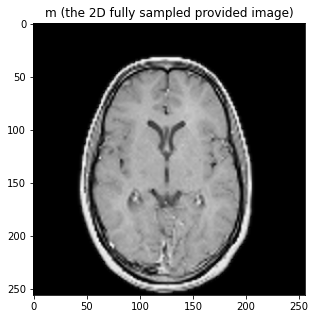

In [17]:
# original image
plt.figure(figsize=(5, 5))
plt.imshow(np.abs(m), cmap='gray')
plt.title("m (the 2D fully sampled provided image)")
plt.show()

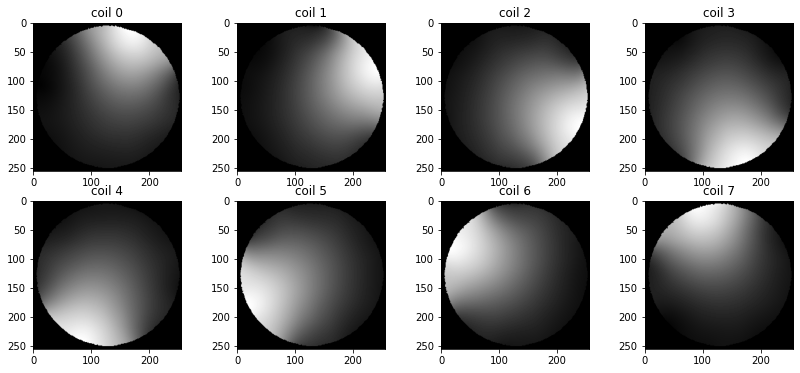

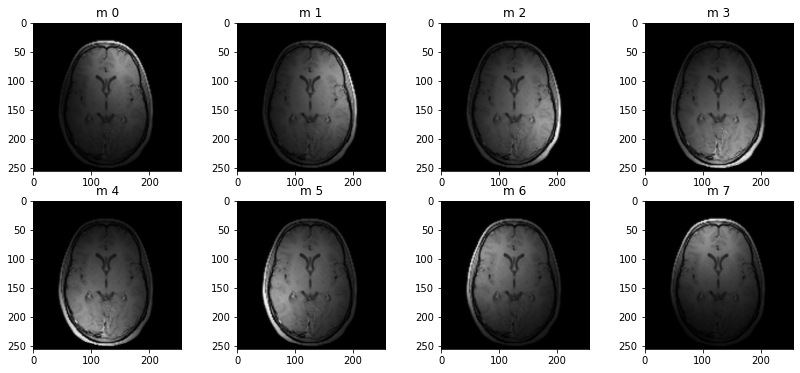

In [18]:
# Coil sensitivity maps and coil images
C_rss = np.sqrt(np.sum(np.abs(C)**2, axis=2))+1e-11
# C_rss = np.sqrt(np.sum(C*C.conj(), axis=2))+1e-11
C /= C_rss[:, :, np.newaxis]

plt.figure(figsize=(14, 6))
for i in range(Nc):
    plt.subplot(2, 4, i+1)
    plt.imshow(np.abs(C[:, :, i]), cmap='gray')
    plt.title("coil "+str(i+0))
plt.show()

M = np.reshape(np.repeat(m, Nc, axis=1), C.shape)*C
plt.figure(figsize=(14, 6))
for i in range(Nc):
    plt.subplot(2, 4, i+1)
    plt.imshow(np.abs(M[:, :, i]), cmap='gray')
    plt.title("m "+str(i+0))
plt.show()

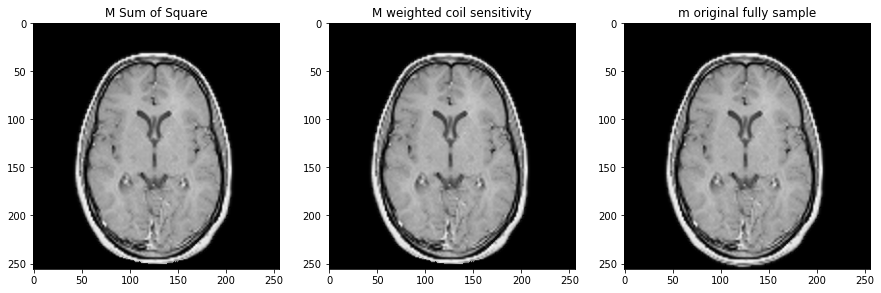

In [19]:
# root-sum-of-square
M_sos = np.sqrt(np.sum(np.abs(M)**2, axis=2))
# weighted coil sensitivity
M_wcs = np.sum(M*C.conj(), axis=2)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.abs(M_sos), cmap='gray')
plt.title("M Sum of Square")
plt.subplot(1, 3, 2)
plt.imshow(np.abs(M_wcs), cmap='gray')
plt.title("M weighted coil sensitivity")
plt.subplot(1, 3, 3)
plt.imshow(np.abs(m), cmap='gray')
plt.title("m original fully sample")
plt.show()

In [20]:
C[128, 128, :]@C[128, 128, :].conj()

(0.9999999999968272+0j)

**Comment**: Coil sensitivity map was normalized to ensure that $CC^H=1$.

### Assignment b
(6 marks) Generate 2 uniform undersampling patterns with acceleration factors of 3 and 7 ($U_3$ and $U_7$) and 2 random undersampling patterns ($U_{R3}$ and $U_{R7}$). Each sampling pattern must be a matrix with 1s in the sampled positions and 0s in the remaining entries. Obtain the corresponding point spread functions (PSFs) and comment about the expected aliasing generated by these undersampling patterns.

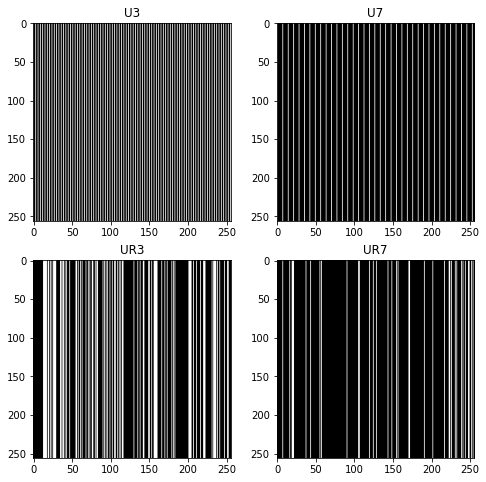

In [21]:
U3 = np.zeros_like(M)
U7 = np.zeros_like(M)
UR3 = np.zeros_like(M)
UR7 = np.zeros_like(M)

U3[:, np.arange(0, 256, 3, dtype=int), :] = 1
U7[:, np.arange(0, 256, 7, dtype=int), :] = 1
UR3[:, np.random.choice(256, 256//3, replace=False)] = 1
UR7[:, np.random.choice(256, 256//7, replace=False)] = 1

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(np.abs(U3[:,:,0]), cmap='gray')
plt.title("U3")
plt.subplot(2,2,2)
plt.imshow(np.abs(U7[:,:,0]), cmap='gray')
plt.title("U7")
plt.subplot(2,2,3)
plt.imshow(np.abs(UR3[:,:,0]), cmap='gray')
plt.title("UR3")
plt.subplot(2,2,4)
plt.imshow(np.abs(UR7[:,:,0]), cmap='gray')
plt.title("UR7")
plt.show()

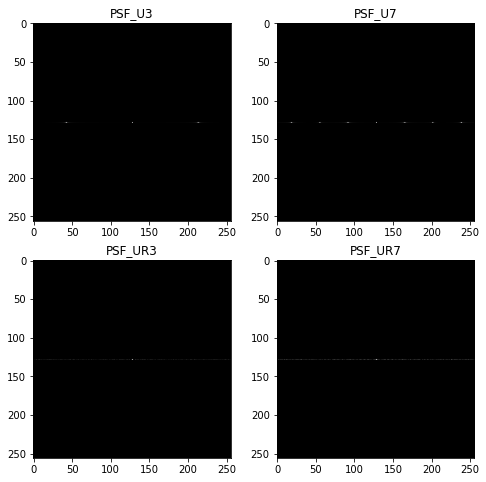

In [22]:
PSF_U3 = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(U3[:,:,0])))
PSF_U7 = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(U7[:,:,0])))
PSF_UR3 = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(UR3[:,:,0])))
PSF_UR7 = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(UR7[:,:,0])))

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(np.abs(PSF_U3), cmap='gray')
plt.title("PSF_U3")
plt.subplot(2,2,2)
plt.imshow(np.abs(PSF_U7), cmap='gray')
plt.title("PSF_U7")
plt.subplot(2,2,3)
plt.imshow(np.abs(PSF_UR3), cmap='gray')
plt.title("PSF_UR3")
plt.subplot(2,2,4)
plt.imshow(np.abs(PSF_UR7), cmap='gray')
plt.title("PSF_UR7")
plt.show()

**Comment**: The PSFs for undersampling patterns were obtained by taking the inverse Fourier transform of the sampling patterns.

## Assignment c
(4 marks) Obtain the aliased images for each coil as a result of undersampling with the
generated patterns. For this you should use:
$$b_i=F^{-1}UFC_i m$$
where U is the corresponding undersampling pattern, F is the Fourier transform and b i are
the aliased images for each coil i= 1,2,...,Nc. Depict and compare the aliased images for the
different undersampling factors and patterns.

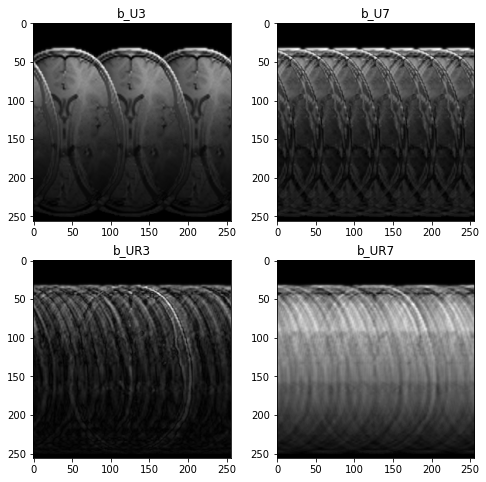

In [23]:
b_U3 = fftshift(ifft2(ifftshift(U3*fftshift(fft2(ifftshift(M))))))
b_U7 = fftshift(ifft2(ifftshift(U7*fftshift(fft2(ifftshift(M))))))
b_UR3 = fftshift(ifft2(ifftshift(UR3*fftshift(fft2(ifftshift(M))))))
b_UR7 = fftshift(ifft2(ifftshift(UR7*fftshift(fft2(ifftshift(M))))))

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(np.abs(b_U3)[:,:,0], cmap='gray')
plt.title("b_U3")
plt.subplot(2,2,2)
plt.imshow(np.abs(b_U7)[:,:,0], cmap='gray')
plt.title("b_U7")
plt.subplot(2,2,3)
plt.imshow(np.abs(b_UR3)[:,:,0], cmap='gray')
plt.title("b_UR3")
plt.subplot(2,2,4)
plt.imshow(np.abs(b_UR7)[:,:,0], cmap='gray')
plt.title("b_UR7")
plt.show()


### Assignment d
(16 marks) The SENSE undersampled reconstruction can be written as a linear problem:
$$Em=B$$
where m is the image to be reconstructed and the encoding matrix E = UFC corresponds to the forward sampling operator, with U the undersampling operator, F the Fourier transform operator, C the coil sensitivity maps and B the undersampled k-space data.

Iterative SENSE reconstruction is obtained by solving the linear problem Em = B as a least square minimization $\min_m\|Em-B\|_2^2$. Implement the Gradient Descent method to solve the above problem. To do this, you can use the forward E and conjugate transpose E H SENSE encoding operators you implemented in MRI Recon Lab.

Show and compare your results for the undersampling patterns generated in part b. What can you conclude from them? How many iterations are needed to reconstruct acquisitions with the different sampling patterns?

100%|██████████| 50/50 [00:07<00:00,  6.59it/s]


Gradient Descend


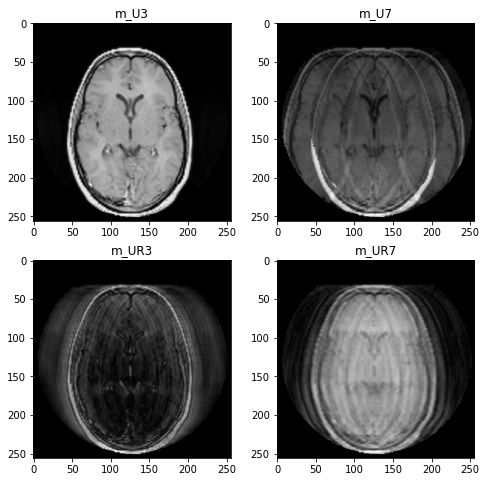

In [24]:
def E(U, C, m):
    return U*fftshift(fft2(ifftshift(C*m[:, :, np.newaxis]), axes=(0, 1)))


def EH(C, b):
    res = np.sum(fftshift(ifft2(ifftshift(b), axes=(0, 1)))
                 * C.conj(), axis=2)
    return res


def MSE(m, m_):
    e = m-m_
    return np.sum(np.abs(e)**2)/np.shape(m)[0]/np.shape(m)[1]


def Gradient_Descent(U, C, b, maxit):
    m_ = EH(C, b)
    r = m_-EH(C, E(U, C, m_))
    mse_history = [MSE(m, m_)]
    for i in tqdm(range(maxit)):
        a = np.abs(np.sum(r.conj()*r)/np.sum(r.conj()*EH(C, E(U, C, r))))
        m_ += a*r
        mse_history.append(MSE(m, m_))
        # Early Stopping
        err = np.sum(np.abs(r))
        if err < 1e-3:
            print('Converged at', i, 'with error', err)
            break
        r -= a*EH(C, E(U, C, r))
    return m_, mse_history


b_U3 = E(U3, C, m)
b_U7 = E(U7, C, m)
b_UR3 = E(UR3, C, m)
b_UR7 = E(UR7, C, m)

m_U3, mse_U3_GD = Gradient_Descent(U3, C, b_U3, 20)
m_U7, mse_U7_GD = Gradient_Descent(U7, C, b_U7, 20)
m_UR3, mse_UR3_GD = Gradient_Descent(UR3, C, b_UR3, 50)
m_UR7, mse_UR7_GD = Gradient_Descent(UR7, C, b_UR7, 50)
# m_U3, mse_U3_GD = Gradient_Descent(U3, C, b_U3, 200)
# m_U7, mse_U7_GD = Gradient_Descent(U7, C, b_U7, 200)
# m_UR3, mse_UR3_GD = Gradient_Descent(UR3, C, b_UR3, 500)
# m_UR7, mse_UR7_GD = Gradient_Descent(UR7, C, b_UR7, 500)

print("Gradient Descend")
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(np.abs(m_U3), cmap='gray')
plt.title("m_U3")
plt.subplot(2, 2, 2)
plt.imshow(np.abs(m_U7), cmap='gray')
plt.title("m_U7")
plt.subplot(2, 2, 3)
plt.imshow(np.abs(m_UR3), cmap='gray')
plt.title("m_UR3")
plt.subplot(2, 2, 4)
plt.imshow(np.abs(m_UR7), cmap='gray')
plt.title("m_UR7")
plt.show()

**Comment**: Iterative SENSE solves linear problem $E\hat{m}=b$ as a least square minization $\min_m\|Em-b\|_2^2$. Applying the gradient descent method, the iterative SENSE algorithm is given by solving $\min_m\|(E^HE)m-E^Hb\|_2^2$. Gradient Descent algorithm:

*Initialize:*
$$m_0=E^Hb$$
$$r_0=m_0-E^HEm_0$$
*Iteration:*
$$\alpha_k=\cfrac{r_k^Tr_k}{r_K^TE^HEr_k}$$
$$m_{k+1}=m_k+\alpha_k r_k$$
$$r_{k+1}=r_k-\alpha_kE^HEr_k$$

200 steps iterations were applied to the uniform undersampling patterns U3 and U7, while 500 steps iterations were applied to the random undersampling patterns UR3 and UR7. 

Early stopping technique was utilized to determine the number of iterations for each undersampling pattern. The stopping criteria was set to be the L1 norm of the difference between the current and previous iteration $\sum\|r_k\|_1$. 

100%|██████████| 50/50 [00:07<00:00,  6.64it/s]


Conjugate Gradient Descend


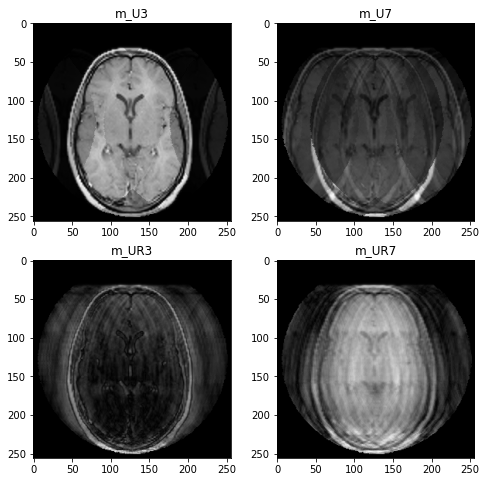

In [30]:
def Conjugate_Gradient_Descent(U, C, b, maxit):
    m_ = EH(C, b)
    r = m_-EH(C, E(U, C, m_))
    p = r.copy()
    mse_history = [MSE(m, m_)]
    for i in tqdm(range(maxit)):
        a = np.abs(np.sum(r*r.conj())/np.sum(p.conj()*EH(C, E(U, C, p))))
        m_ += a*p
        r_ = r
        r -= a*EH(C, E(U, C, p))
        mse_history.append(MSE(m, m_))
        # Early Stopping
        err = np.sum(np.abs(r))
        if err < 1e-1:
            print('Converged at', i, 'with error', err)
            break
        b = np.abs(np.sum(r*r.conj())/np.sum(r_*r_.conj()))
        p = r + b*p
    return m_, mse_history

b_U3= E(U3, C, m)
b_U7= E(U7, C, m)
b_UR3= E(UR3, C, m)
b_UR7= E(UR7, C, m)

m_U3, mse_U3_CGD  = Conjugate_Gradient_Descent(U3, C, b_U3, 20)
m_U7, mse_U7_CGD = Conjugate_Gradient_Descent(U7, C, b_U7, 20)
m_UR3, mse_UR3_CGD = Conjugate_Gradient_Descent(UR3, C, b_UR3, 50)
m_UR7, mse_UR7_CGD  = Conjugate_Gradient_Descent(UR7, C, b_UR7, 50)

print("Conjugate Gradient Descend")
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(np.abs(m_U3), cmap='gray')
plt.title("m_U3")
plt.subplot(2, 2, 2)
plt.imshow(np.abs(m_U7), cmap='gray')
plt.title("m_U7")
plt.subplot(2, 2, 3)
plt.imshow(np.abs(m_UR3), cmap='gray')
plt.title("m_UR3")
plt.subplot(2, 2, 4)
plt.imshow(np.abs(m_UR7), cmap='gray')
plt.title("m_UR7")
plt.show()

### Assignment e
(5 marks) Define the reconstruction error as the difference between the fully sampled image {m} and your reconstructions ̂$\hat{m}$ as:
$$e=m-\hat{m}$$
and the mean square error (MSE) of the reconstruction as
$$\epsilon=\frac{1}{N}\sum_{i=1}^N |m(i)-\hat{m}(i)|^2$$
where $i=1\cdots N$ indicate each pixel in the image.
For all reconstructions (i.e. uniform and random 3x and 7x) plot the MSE w.r.t the number of iterations for the Gradient descent iterative SENSE method implemented. Comment about the convergence of the method.

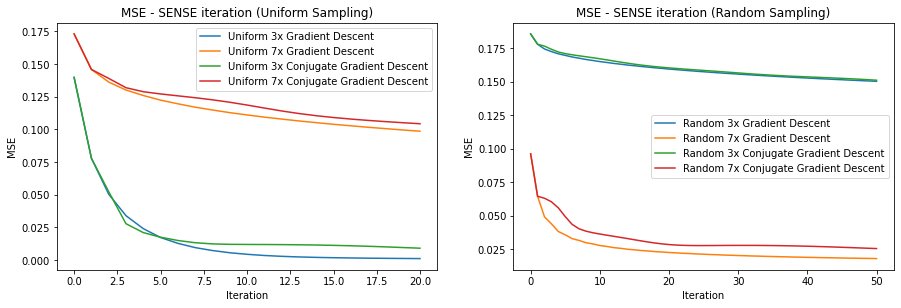

In [31]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(mse_U3_GD, label='Uniform 3x Gradient Descent')
plt.plot(mse_U7_GD, label='Uniform 7x Gradient Descent')
plt.plot(mse_U3_CGD, label='Uniform 3x Conjugate Gradient Descent')
plt.plot(mse_U7_CGD, label='Uniform 7x Conjugate Gradient Descent')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE - SENSE iteration (Uniform Sampling)")

plt.subplot(2, 2, 2)
plt.plot(mse_UR3_GD, label='Random 3x Gradient Descent')
plt.plot(mse_UR7_GD, label='Random 7x Gradient Descent')
plt.plot(mse_UR3_CGD, label='Random 3x Conjugate Gradient Descent')
plt.plot(mse_UR7_CGD, label='Random 7x Conjugate Gradient Descent')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE - SENSE iteration (Random Sampling)")
plt.show()
